In [3]:
import tensorflow as tf
import sklearn
import numpy as np 
import matplotlib.pyplot as plt
import os

Output of the image: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of the image: (28, 28, 1)


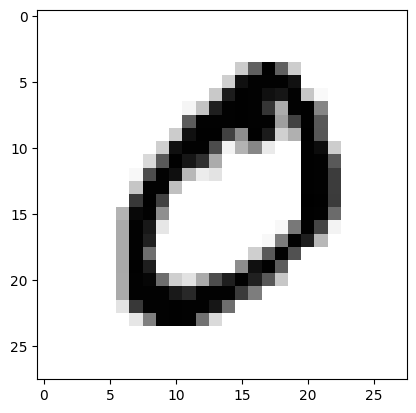

In [13]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()
xtrain=xtrain.reshape((xtrain.shape[0],28,28,1))
xtest=xtest.reshape((xtest.shape[0],28,28,1))
#one hot encode target values since the output exists in continuous form

ytrain=tf.keras.utils.to_categorical(ytrain)
ytest=tf.keras.utils.to_categorical(ytest)

#See the particular image from index
plt.imshow(xtrain[1],cmap=plt.cm.binary)
print(f'Output of the image: {(ytrain[1])}')

print(f'Shape of the image: {xtrain[0].shape}') #The image dimesnions are 28x28





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

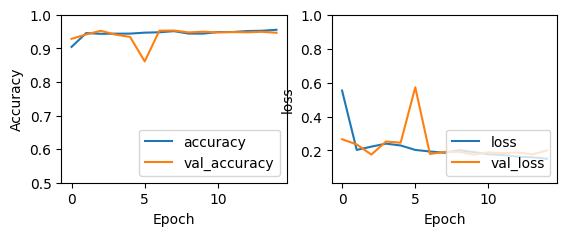

In [6]:
def create_cnn_model():
    model=tf.keras.models.Sequential() #if imported from tensorflow.keras import models we would write models.Sequential

    model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.summary()
    return model

def plot_metrics_for_training(history):

    plt.subplot(221)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    plt.subplot(222)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0.01, 1])
    plt.legend(loc='lower right')

CNN_model=create_cnn_model()
history_for_plotting=CNN_model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest),shuffle=True)
plot_metrics_for_training(history_for_plotting)

In [17]:
def create_folder():
    try:
        os.mkdir('Model')
    except:
        pass

create_folder()
CNN_model.save_weights('Model/SS_Model.h5')


In [18]:
Loaded_model=create_cnn_model()
Loaded_model.load_weights('Model/SS_Model.h5')

#Display the results from previous weights on test cases 
print(Loaded_model.evaluate(xtest,ytest))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

1/1 [==============================] - 0s 58ms/step
Predicted by Model: 2


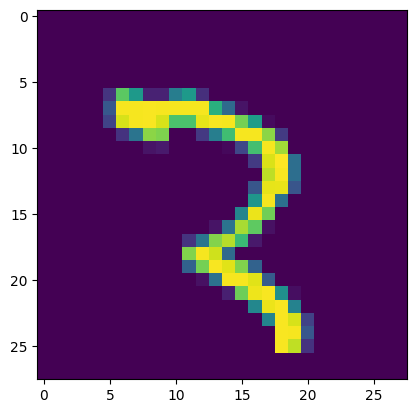

In [34]:
#Provide value and on that basis its going to fetch one value
index=int(input(f'Enter value between 0 to {len(xtrain)}: '))
plt.imshow(xtrain[index])
output=Loaded_model.predict(xtrain[index].reshape(1,28,28,1))
output=np.argmax(output[0])
print(f"Predicted by Model: {output}")
#print(Loaded_model.predict())

1/1 [==============================] - 0s 65ms/step
7


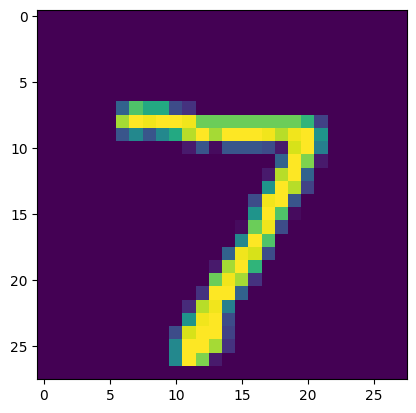

In [33]:
def load_image(filename):
    # load the image
    img = tf.keras.utils.load_img(filename, color_mode='grayscale', target_size=(28, 28))
    # convert to array
    img = tf.keras.utils.img_to_array(img)
    # reshape into a single sample with 1 channel
    plt.imshow(img)
    img = img.reshape(1, 28, 28, 1)
    return img

img=load_image(r'D:\Training\CNN-basics-on-MNIST-Dataset\Test_images\test_img_1.png')
print(np.argmax(Loaded_model.predict(img)))
